## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "worldcup"
hashtag = "ワールドカップ"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-24T00:00+09:00"
end = "2022-11-24T20:30+09:00"
timespan = "24-24"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

DF = df.copy()

In [4]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=15')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 69


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/worldcup/original/ワールドカップ_24-24_69_aam


In [6]:
G.number_of_nodes()

19142

In [ ]:
tb.check_degree(G)

In [ ]:
tb.plot_dd(G, 20)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [7]:
G.remove_node(hashtag)
#G.remove_nodes_from([hashtag, ""])
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
['サムライジャパン！', 'ノイアーよけた', '森保さん', '♾', '大人の絵日記', '歴史的勝利！！', '日本がんばれ', 'libertycity_tokyo', '革靴', 'ホルモンたけ田', '牛たんやきみのる', '吸血鬼すぐ死ぬ', 'すしのいずみ', 'デットマールクラマー', 'すごいぞ日本']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [ ]:
tb.check_degree(G)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [8]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_worldcup_24-24_69.pdf
../data/figure/degree_distribution/pdfccdf2_worldcup_24-24_69.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.447670380415677, 
its standard error sigma: 0.04480427347669842, 
k_min: 62.0


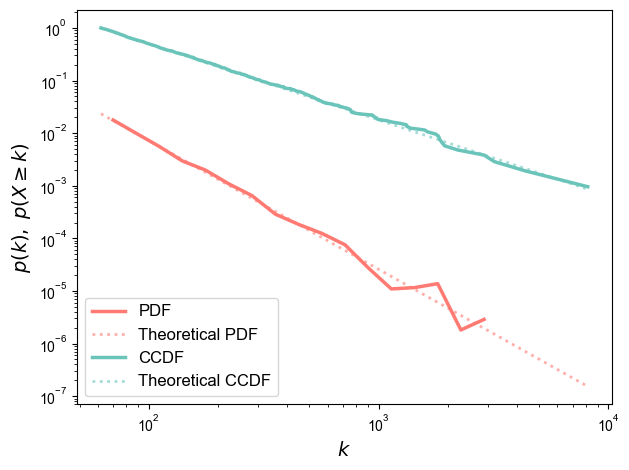

In [10]:
#tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.447670380415677, 
its standard error sigma: 0.04480427347669842, 
k_min: 62.0


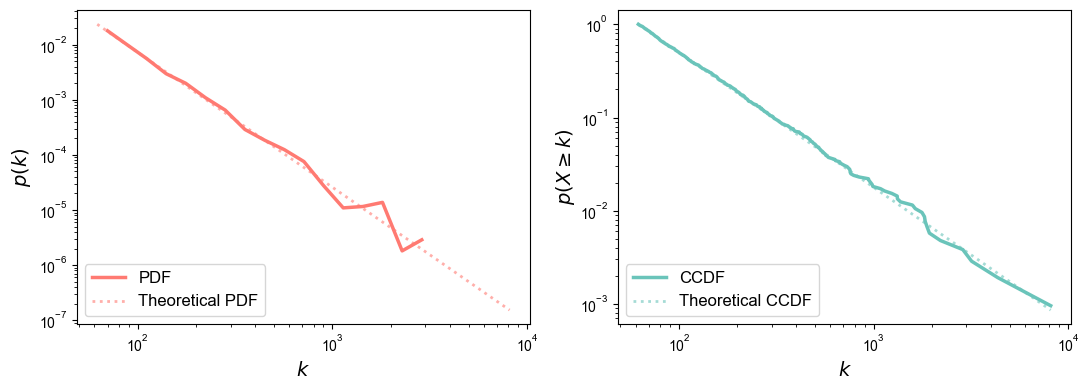

In [11]:
#tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA")
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [12]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')